# Aircraft Risk Analysis.

## Project Overview
Our company is diversifying its portfolio by entering the aviation industry. To ensure a safe and successful entry, the leadership team is exploring which aircraft models are lowest risk for purchase and operation. This project aims to analyze historical aviation accident data to determine which aircraft present the **lowest operational risk**, enabling data-driven acquisition decisions for both **commercial** and **private enterprise** use cases.

![aircraft](images\aircraft.jpg)

Photo by <a href="https://media.istockphoto.com/id/1455888136/photo/luxury-private-jet.jpg?s=612x612&w=0&k=20&c=jtAd4usrdWHczYRQtc4WfSbBjhU2xB7gNv13fgLrz_k=">dicus63</a> on <a href="https://media.istockphoto.com/id/1455888136/photo/luxury-private-jet.jpg?s=612x612&w=0&k=20&c=jtAd4usrdWHczYRQtc4WfSbBjhU2xB7gNv13fgLrz_k=">Istock</a>


## Business Understanding
### Problem Statement
> The company is planning to enter the aviation industry but lacks expertise in identifying safe and reliable aircraft. The task is analyzing aviation incident data to determine which aircraft are the **lowest risk**. Your insights will help the aviation division make informed purchasing decisions.


### Objectives
- Identify aircraft models with **the fewest or least severe incidents**.
- Understand patterns and risk factors across different aircraft.
- Providing actionable recommendations in to our stakeholders who are non technical

## Data Understanding
The dataset contains historical records of aviation incidents and accidents, including:
- Aircraft information (Make, Model, Engine Type)
- Incident characteristics (Injury Severity, Damage, Weather Conditions)
- Operational context (Purpose of Flight, Number of Engines)

# Exploring the Aviation Dataset
First, i imported the essential libraries:

- Pandas to work with data in table format.

- Seaborn for creating beautiful visualizations.

- Matplotlib for additional plotting controls.

I also activated inline plotting with %matplotlib inline so that all plots will show directly in the notebook.




In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

I loaded the aviation incident data from a file called AviationData.csv using:

In [2]:
# loading AviationData.csv as aviation_df 
aviation_df = pd.read_csv("AviationData.csv", encoding="ISO-8859-1")
aviation_df.head()

c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


I specified the encoding as ISO-8859-1 to correctly handle any special characters that might be in the file.

I explored the size and structure of the data by:

- Checking its shape with aviation_df.shape to see how many rows and columns we have.

- Viewing detailed column info (data types, non-null counts) using aviation_df.info().

This step helps us understand:

- How big the dataset is.

- Which columns might have missing data.

- What types of variables (text, numbers, dates) we are dealing with.

In [3]:
# dimensionality of the data
aviation_df.shape

(88889, 31)

In [4]:
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

## Data Cleaning
### Handling missing values

We started by checking how much missing data we have in each column using:

In [5]:
aviation_df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

Our Dataset contains many null and inconsistent values. The first step is to identify the columns that are irrelevant to my dataset and drop them.
I did my cleaning on a copy of the original dataset.

By creating a copy, I kept the original data safe and untouched, just in case I need to refer back to it later.

In [6]:
drop_cols = [
    "Publication.Date", "Report.Status", "FAR.Description",
    "Air.carrier", "Schedule", "Airport.Code", "Airport.Name",
    "Latitude", "Longitude", "Registration.Number"
]
aviation_df_cleaned = aviation_df.drop(columns=drop_cols).copy()

In [7]:
aviation_df_cleaned.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
Purpose.of.flight          6192
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
dtype: int64

I noticed that some important columns still had missing values. Instead of dropping them, I decided to fill the missing entries with a placeholder: 'Unknown'.

The selected columns were:

In [8]:
fill_unknown = [
    "Injury.Severity", "Aircraft.damage", "Amateur.Built",
    "Engine.Type", "Purpose.of.flight", "Weather.Condition",
    "Broad.phase.of.flight"
]
aviation_df_cleaned[fill_unknown] = aviation_df_cleaned[fill_unknown].fillna('Unknown')

These columns describe important characteristics of the incidents, so it was better to keep them — even if some information is missing.

In [9]:
aviation_df_cleaned['Number.of.Engines'].value_counts()

1.0    69582
2.0    11079
0.0     1226
3.0      483
4.0      431
8.0        3
6.0        1
Name: Number.of.Engines, dtype: int64

- `Number.of.Engines` was filled with 1 (default assumption for small aircraft)

In [10]:
# filling the number of engines column with 1 
aviation_df_cleaned["Number.of.Engines"] = aviation_df_cleaned["Number.of.Engines"].fillna(1)
aviation_df_cleaned["Number.of.Engines"].isna().sum()

0

- Location-related fields (`Country`, `Location`) were filled with `"Unknown"` to preserve rows for potential future insights and coonsistency of the dataset.

In [11]:
# fill 'country' and 'location' with 'unknown'
aviation_df_cleaned["Country"] = aviation_df_cleaned["Country"].fillna("Unknown")
aviation_df_cleaned["Location"] = aviation_df_cleaned["Location"].fillna("Unknown")

I removed any rows where either Event.Date or Accident.Number was missing:

In [12]:
# drop rows with missing values in 'Event.Date' or 'Accident.Number'
aviation_df_cleaned.dropna(subset=["Event.Date", "Accident.Number"], inplace=True)
aviation_df_cleaned.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       0
Injury.Severity               0
Aircraft.damage               0
Aircraft.Category         56602
Make                         63
Model                        92
Amateur.Built                 0
Number.of.Engines             0
Engine.Type                   0
Purpose.of.flight             0
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition             0
Broad.phase.of.flight         0
dtype: int64

In [13]:
# filling missing numerical columns with 0 (assume no injuries unless recorded)
injury_cols = [
    'Total.Fatal.Injuries', 'Total.Serious.Injuries',
    'Total.Minor.Injuries', 'Total.Uninjured'
]
aviation_df_cleaned[injury_cols] = aviation_df_cleaned[injury_cols].fillna(0)


- Key fields like `Make` and `Model` are **critical** for risk analysis — rows missing these were dropped.

In [14]:
# Drop rows missing Make or Model – critical for identifying aircraft risk
aviation_df_cleaned.dropna(subset=['Make', 'Model'], inplace=True)

In [15]:
# filling missing values Aircraft.Category with 'unknown'
aviation_df_cleaned['Aircraft.Category'] = aviation_df_cleaned['Aircraft.Category'].fillna('Unknown')

In [31]:
aviation_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88777 entries, 0 to 88888
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88777 non-null  object 
 1   Investigation.Type      88777 non-null  object 
 2   Accident.Number         88777 non-null  object 
 3   Event.Date              88777 non-null  object 
 4   Location                88777 non-null  object 
 5   Country                 88777 non-null  object 
 6   Injury.Severity         88777 non-null  object 
 7   Aircraft.damage         88777 non-null  object 
 8   Aircraft.Category       88777 non-null  object 
 9   Make                    88777 non-null  object 
 10  Model                   88777 non-null  object 
 11  Amateur.Built           88777 non-null  object 
 12  Number.of.Engines       88777 non-null  float64
 13  Engine.Type             88777 non-null  object 
 14  Purpose.of.flight       88777 non-null

After thhe cleaning process:

- I now have 88,777 complete entries.

- There are 21 well-organized columns capturing critical details about each event.

- All missing values in important fields like Event.Date, Accident.Number, Country, and Location have been handled.

- Non-critical missing information (like injury severity or weather conditions) has been clearly marked as 'Unknown' instead of being left blank.



## Exploratory Data Analysis(EDA)
The purpose of this EDA is to explore trends, patterns, and relationships in the aircraft incident data to help identify which aircraft types are associated with lower risk.

1. Top 10 Aircrafts models and makes Involved in Accidents

In [35]:
# Top 10 models Involved with accidents
top_aircraft_models = aviation_df_cleaned["Model"].value_counts().head(10)
top_aircraft_models


152          2367
172          1756
172N         1164
PA-28-140     932
150           829
172M          798
172P          689
182           659
180           622
150M          585
Name: Model, dtype: int64

The above are the Top 10 aircraft models involved in accidents. These models may be more prone to issues, or simply more commonly flown.

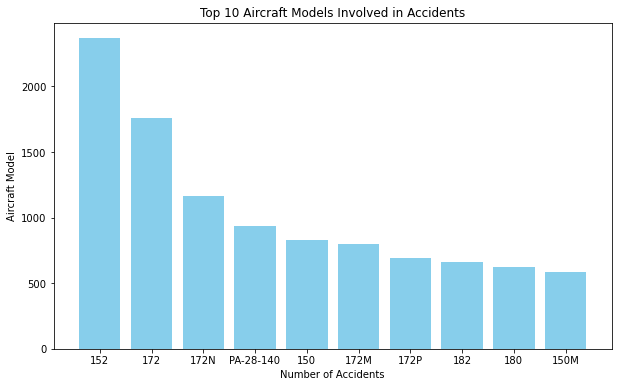

In [62]:
fig, ax = plt.subplots(figsize=(10,6))

ax.bar(
    top_aircraft_models.index, top_aircraft_models.values, color='skyblue'
)
ax.set_xlabel("Number of Accidents")
ax.set_ylabel("Aircraft Model")
ax.set_title("Top 10 Aircraft Models Involved in Accidents");

### Recommendations
- Avoid Aircraft Models with Highest Incident Counts. The top 3 models in the above should be discontinued for deeper investigation or 
initial exclusion unless data proves the high count is purely due to high usage.

In [59]:
top_aircraft_make = aviation_df_cleaned["Make"].value_counts().head(10)
top_aircraft_make

Cessna     22226
Piper      12029
CESSNA      4919
Beech       4330
PIPER       2840
Bell        2134
Boeing      1593
BOEING      1145
Grumman     1094
Mooney      1092
Name: Make, dtype: int64

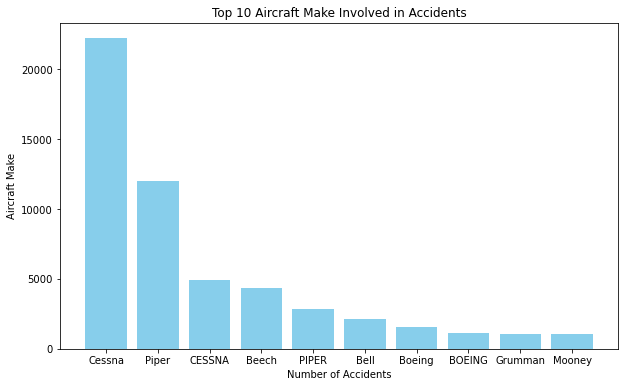

In [61]:
fig, ax = plt.subplots(figsize=(10,6))

ax.bar(
    top_aircraft_make.index, top_aircraft_make.values, color='skyblue'
)
ax.set_xlabel("Number of Accidents")
ax.set_ylabel("Aircraft Make")
ax.set_title("Top 10 Aircraft Make Involved in Accidents");

2. Aircraft make and model combinations with the highest fatality rates

In [57]:
highest_fatality_rates = aviation_df_cleaned.groupby(['Make', 'Model'])['Total.Fatal.Injuries'].sum().sort_values(ascending=False).head(10)
highest_fatality_rates

Make     Model    
BOEING   737          1348.0
Boeing   737-200       906.0
BOEING   777 - 206     534.0
Boeing   MD-82         403.0
AIRBUS   A321          381.0
Cessna   172N          365.0
Piper    PA-28-181     359.0
Cessna   152           349.0
Tupolev  TU-154        349.0
Boeing   747-168       349.0
Name: Total.Fatal.Injuries, dtype: float64

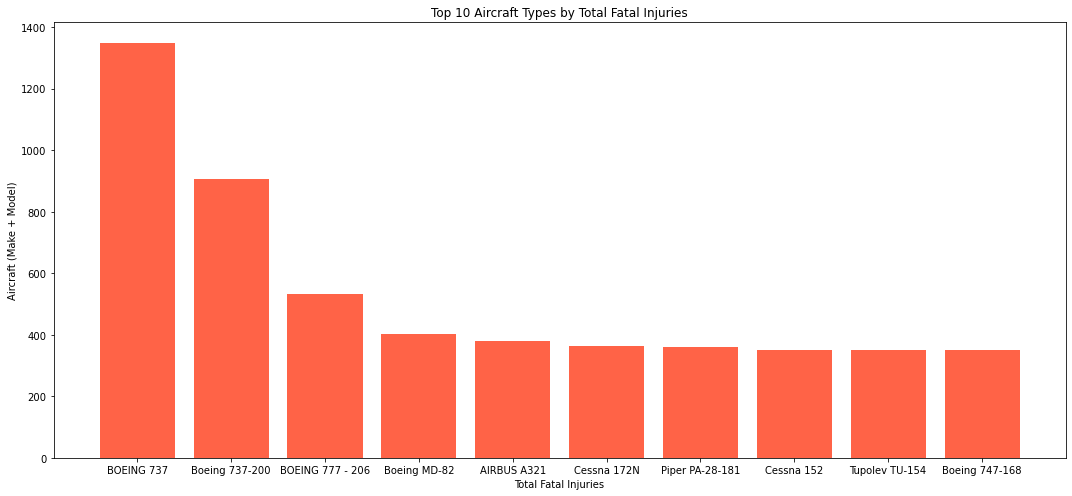

In [82]:
# Create formatted labels like "Boeing 737"
labels = [f"{make} {model}" for make, model in highest_fatality_rates.index]

# Plotting
fig, ax = plt.subplots(figsize=(15, 7))
bars = ax.bar(labels, highest_fatality_rates.values, color="tomato")
ax.set_xlabel("Total Fatal Injuries")
ax.set_ylabel("Aircraft (Make + Model)")
ax.set_title("Top 10 Aircraft Types by Total Fatal Injuries")
plt.tight_layout()

#go back



3. What are the most dangerous flight phases(based on fatalities)

In [78]:
dangerous_phases = aviation_df_cleaned.groupby("Broad.phase.of.flight")['Total.Fatal.Injuries'].sum().sort_values(ascending=False)
dangerous_phases


Broad.phase.of.flight
Unknown        26362.0
Cruise          6170.0
Maneuvering     5319.0
Takeoff         4302.0
Approach        3836.0
Climb           1759.0
Descent          913.0
Go-around        587.0
Landing          518.0
Standing         161.0
Taxi             102.0
Other             85.0
Name: Total.Fatal.Injuries, dtype: float64

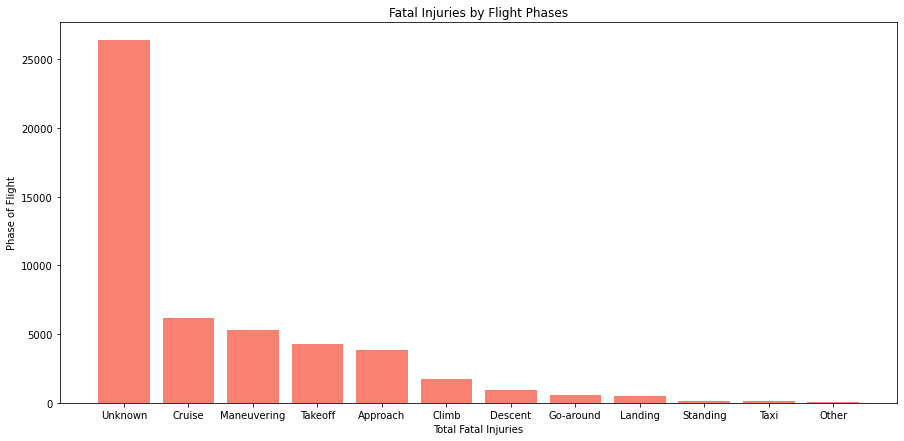

In [81]:
fig, ax = plt.subplots(figsize=(15,7))

ax.bar(
    dangerous_phases.index, dangerous_phases.values, color="salmon"
)
ax.set_xlabel("Total Fatal Injuries")
ax.set_ylabel("Phase of Flight")
ax.set_title("Fatal Injuries by Flight Phases");

4. Do Weather conditions affect the severity of incidents?

In [83]:
weather_severity = aviation_df_cleaned.groupby("Weather.Condition")["Total.Fatal.Injuries"].mean().sort_values(ascending=False)
weather_severity

Weather.Condition
UNK        2.816159
Unknown    2.259518
IMC        1.978898
Unk        1.244275
VMC        0.330572
Name: Total.Fatal.Injuries, dtype: float64

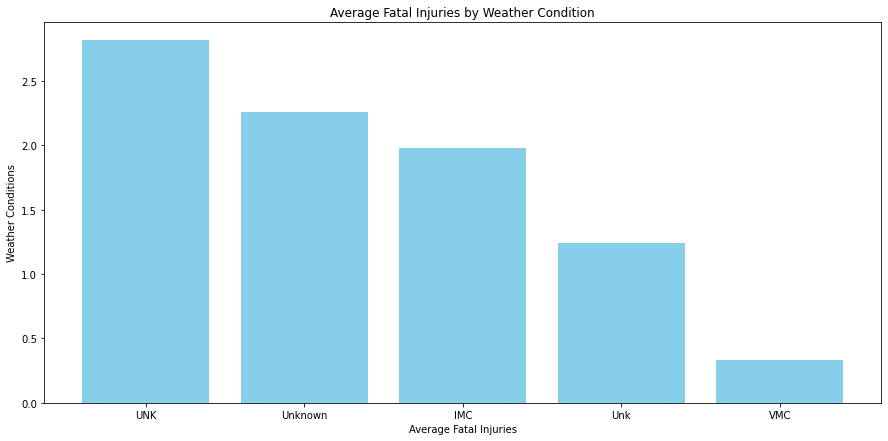

In [85]:
fig, ax = plt.subplots(figsize=(15,7))

ax.bar(
    weather_severity.index, weather_severity.values, color="skyblue"
)
ax.set_xlabel("Average Fatal Injuries")
ax.set_ylabel("Weather Conditions")
ax.set_title("Average Fatal Injuries by Weather Condition");

In [97]:
engine_injury_df = aviation_df_cleaned[['Number.of.Engines', 'Total.Fatal.Injuries']].dropna()

In [98]:
engine_injury_df['Number.of.Engines'] = pd.to_numeric(engine_injury_df['Number.of.Engines'], errors='coerce')
engine_injury_df['Total.Fatal.Injuries'] = pd.to_numeric(engine_injury_df['Total.Fatal.Injuries'], errors='coerce')

Correlation between Number of Engines and Total Fatal Injuries: 0.05


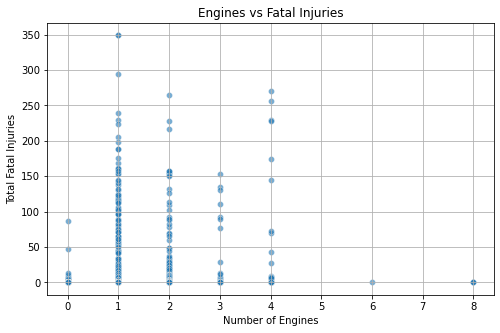

In [99]:
# Drop remaining NaNs
engine_injury_df.dropna(inplace=True)

# Calculate correlation
correlation = engine_injury_df.corr().iloc[0, 1]
print(f"Correlation between Number of Engines and Total Fatal Injuries: {correlation:.2f}")

# Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=engine_injury_df, x='Number.of.Engines', y='Total.Fatal.Injuries', alpha=0.6)
plt.title("Engines vs Fatal Injuries")
plt.xlabel("Number of Engines")
plt.ylabel("Total Fatal Injuries")
plt.grid(True)
plt.show()

In [95]:
aviation_df_cleaned.to_csv("aviationData_cleaned.csv")